## Comparing DLC Camera CSV 3D coordinate Data to Autobender/Rotary Encoder

In [77]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [78]:
from config import path_to_repository
from analysis import DLC3DBendAngles
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

In [79]:
#load rotary encoder csv, camera 3d data form DLC csv, and flir_data.mat with timestamps from python camera acquisition

renc = os.path.join(path_to_repository , "CSV Data/8_20_25/data_rotenc_2025_08_20_18_37_05.csv")
df_renc = pd.read_csv(renc)  
cam = os.path.join(path_to_repository , "CSV Data/8_20_25/2025_08_20_18_37_05_DLC_3D.csv")
cam_timestamp = os.path.join(
    path_to_repository,
    "CSV Data/8_20_25/flir_data.mat"
)


In [80]:
#load DLC 3d coordinates from DLC triangulation
cam = DLC3DBendAngles(cam)

# Load only variables starting with 'ts' -> timestamp data
df_ts = cam.load_mat_as_df(cam_timestamp, prefix="ts")

In [81]:
#check number of rows from  cam dataframe (taken from DLC csv) and df_ts dataframe (timestamps form flir_data.mat file).  They hopefully are the same.  If not, need to determine which frames dropped.
rows_renc, rows_cam = DLC3DBendAngles.compare_row_counts(cam.df, df_ts)

DataFrame 1: 199 rows
DataFrame 2: 199 rows


In [82]:
#add camera timestamp columns to 3d dlc data
cam.add_dataframe(df_ts)

scorer    DLC_3D                                                      \
    bodyparts       PIP                            MCP                        
       coords         x         y          z         x         y          z   
0           0 -1.438807 -3.298536  42.708320  4.337599 -1.730207  26.826557   
1           1 -1.442745 -3.305073  42.712520  4.333509 -1.730120  26.836530   
2           2 -1.417651 -3.315805  42.670600  4.349908 -1.727202  26.803577   
3           3 -1.424321 -3.312437  42.681538  4.348811 -1.729116  26.802416   
4           4 -1.416708 -3.300321  42.670350  4.351246 -1.733642  26.799871   
..        ...       ...       ...        ...       ...       ...        ...   
194       194 -1.629683 -3.355091  43.157810  4.244437 -1.750813  27.027739   
195       195 -1.638723 -3.348212  43.170010  4.231644 -1.750728  27.039368   
196       196 -1.635918 -3.371583  43.156487  4.239607 -1.755564  27.028364   
197       197 -1.615460 -3.349595  43.123170  4.241820 -1.743539  27.021082   
198       198 -1.605148 -3.357819  43.105860  4.250679 -1.745388  27.009447   

                                                                     \
         hand                      radius_styloid_process             
            x         y          z                      x         y   
0    5.210904 -1.470969  24.186527               7.548749 -1.560993   
1    5.205885 -1.472540  24.198097               7.545729 -1.562476   
2    5.220656 -1.468993  24.160551               7.551590 -1.558664   
3    5.221548 -1.470852  24.158010               7.551794 -1.559763   
4    5.221748 -1.469167  24.155643               7.552746 -1.559101   
..        ...       ...        ...                    ...       ...   
194  5.133344 -1.483756  24.376802               7.507989 -1.581740   
195  5.123273 -1.482489  24.386532               7.500916 -1.581217   
196  5.131914 -1.489478  24.380655               7.506407 -1.584136   
197  5.133579 -1.482822  24.368383               7.507170 -1.579242   
198  5.142301 -1.486797  24.356630               7.515163 -1.580043   

                                                ts_25183199   ts_25185174  
                 forearm                                                   
             z         x         y          z                              
0    16.967735  8.591195 -1.403142  13.750254  183711125116  183711132531  
1    16.971030  8.578577 -1.407764  13.746964  183711173552  183711184545  
2    16.946867  8.584173 -1.405230  13.732217  183711226773  183711236200  
3    16.945670  8.590002 -1.401300  13.726608  183711277172  183711286935  
4    16.943422  8.590423 -1.400494  13.725775  183711324910  183711332506  
..         ...       ...       ...        ...           ...           ...  
194  17.087310  8.579907 -1.424568  13.827077  183720904685  183720914406  
195  17.086080  8.562584 -1.429076  13.834993  183720951743  183720959919  
196  17.080935  8.574086 -1.425510  13.826846  183721012779  183721020263  
197  17.086050  8.576895 -1.421343  13.828471  183721052240  183721059501  
198  17.083141  8.585393 -1.423738  13.828265  183721105458  183721112448  

[199 rows x 18 columns]

## Bend Angle obtained from Dot Product Formula

## $\theta = \cos^{-1} \left( \frac{\mathbf{v}_1 \cdot \mathbf{v}_2}{\|\mathbf{v}_1\| \, \|\mathbf{v}_2\|} \right)$

As an example:  

V1 is vector from hand to MCP (vector obtained from subtracting 2 xyz points from triangulated DLC csv data)

V2 is vector from MCP to PIP (vector obtained from subtracting 2 xyz points from triangulated DLC csv data)


In [84]:
#Calculte bend angles from DLC 3d trianglulated data

# --- MCP bend ---
hand_pts = cam.get_points("hand")
mcp_pts  = cam.get_points("MCP")
pip_pts  = cam.get_points("PIP")

v1_mcp = cam.vector(hand_pts, mcp_pts)  # hand→MCP
v2_mcp = cam.vector(mcp_pts, pip_pts)   # MCP→PIP
angles_mcp = cam.angle_from_vectors(v1_mcp, v2_mcp)

# --- Wrist angle ---
forearm_pts = cam.get_points("forearm")
hand_pts = cam.get_points("hand")
mcp_pts = cam.get_points("MCP")

v1_wrist = cam.vector(forearm_pts, hand_pts)  # forearm→hand
v2_wrist = cam.vector(hand_pts, mcp_pts)      # hand→MCP
angles_wrist = cam.angle_from_vectors(v1_wrist, v2_wrist)

# --- Add both angles to a copy of the DataFrame ---
df_out = cam.df.copy()
df_out[("metric", "mcp_bend_deg", "deg")]   = angles_mcp
df_out[("metric", "wrist_bend_deg", "deg")] = angles_wrist

cam.add_dataframe(df_out)



scorer    DLC_3D                                                      \
    bodyparts       PIP                            MCP                        
       coords         x         y          z         x         y          z   
0           0 -1.438807 -3.298536  42.708320  4.337599 -1.730207  26.826557   
1           1 -1.442745 -3.305073  42.712520  4.333509 -1.730120  26.836530   
2           2 -1.417651 -3.315805  42.670600  4.349908 -1.727202  26.803577   
3           3 -1.424321 -3.312437  42.681538  4.348811 -1.729116  26.802416   
4           4 -1.416708 -3.300321  42.670350  4.351246 -1.733642  26.799871   
..        ...       ...       ...        ...       ...       ...        ...   
194       194 -1.629683 -3.355091  43.157810  4.244437 -1.750813  27.027739   
195       195 -1.638723 -3.348212  43.170010  4.231644 -1.750728  27.039368   
196       196 -1.635918 -3.371583  43.156487  4.239607 -1.755564  27.028364   
197       197 -1.615460 -3.349595  43.123170  4.241820 -1.743539  27.021082   
198       198 -1.605148 -3.357819  43.105860  4.250679 -1.745388  27.009447   

                                                                     \
         hand                      radius_styloid_process             
            x         y          z                      x         y   
0    5.210904 -1.470969  24.186527               7.548749 -1.560993   
1    5.205885 -1.472540  24.198097               7.545729 -1.562476   
2    5.220656 -1.468993  24.160551               7.551590 -1.558664   
3    5.221548 -1.470852  24.158010               7.551794 -1.559763   
4    5.221748 -1.469167  24.155643               7.552746 -1.559101   
..        ...       ...        ...                    ...       ...   
194  5.133344 -1.483756  24.376802               7.507989 -1.581740   
195  5.123273 -1.482489  24.386532               7.500916 -1.581217   
196  5.131914 -1.489478  24.380655               7.506407 -1.584136   
197  5.133579 -1.482822  24.368383               7.507170 -1.579242   
198  5.142301 -1.486797  24.356630               7.515163 -1.580043   

                                                ts_25183199   ts_25185174  \
                 forearm                                                    
             z         x         y          z                               
0    16.967735  8.591195 -1.403142  13.750254  183711125116  183711132531   
1    16.971030  8.578577 -1.407764  13.746964  183711173552  183711184545   
2    16.946867  8.584173 -1.405230  13.732217  183711226773  183711236200   
3    16.945670  8.590002 -1.401300  13.726608  183711277172  183711286935   
4    16.943422  8.590423 -1.400494  13.725775  183711324910  183711332506   
..         ...       ...       ...        ...           ...           ...   
194  17.087310  8.579907 -1.424568  13.827077  183720904685  183720914406   
195  17.086080  8.562584 -1.429076  13.834993  183720951743  183720959919   
196  17.080935  8.574086 -1.425510  13.826846  183721012779  183721020263   
197  17.086050  8.576895 -1.421343  13.828471  183721052240  183721059501   
198  17.083141  8.585393 -1.423738  13.828265  183721105458  183721112448   

          metric                 
    mcp_bend_deg wrist_bend_deg  
             deg            deg  
0       1.676053       4.984618  
1       1.690147       4.974645  
2       1.735381       4.980679  
3       1.708582       4.948840  
4       1.748047       5.078274  
..           ...            ...  
194     1.471096       5.169565  
195     1.422572       5.225327  
196     1.387632       5.140498  
197     1.402453       5.028451  
198     1.410883       4.974915  

[199 rows x 20 columns]

In [85]:
# Count how many NAN's in MCP Bend Angle ->  max should be size of number of timestamps from camera data 

col_name = ("metric", "mcp_bend_deg", "deg")  # tuple key in MultiIndex

# Count NaNs
num_nans = cam.df[col_name].isna().sum()

# Count total rows
total_rows = len(cam.df)

# Print results
print(f"NaNs in MCP bend angle: {num_nans} / {total_rows} rows")
print(f"Percent missing: {100 * num_nans / total_rows:.2f}%")

NaNs in MCP bend angle: 0 / 199 rows
Percent missing: 0.00%


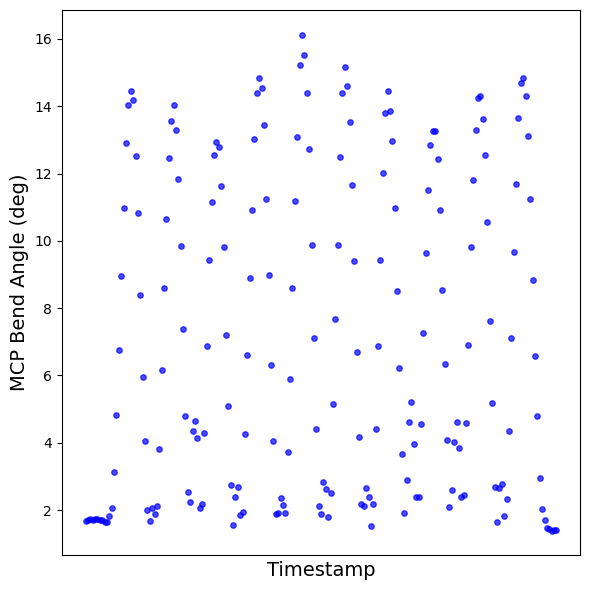

In [86]:
# Plot MCP Bend Angles Calculated from Camera Data vs Camera Timestamp
plt.figure(figsize=(6,6))
plt.scatter(
    cam.df[("ts_25183199", "", "")], 
    cam.df[("metric", "mcp_bend_deg", "deg")],
    s=15, alpha=0.7, color="blue"  # set dots to blue
)

plt.xlabel("Timestamp", fontsize=14)  # bigger label font
plt.ylabel("MCP Bend Angle (deg)", fontsize=14)

# Remove x ticks completely
plt.xticks([])

plt.tight_layout()
plt.savefig("MCP Bend vs timestamp.png", dpi=300, bbox_inches='tight')
plt.show()


In [87]:
cam.df[("ts_25183199", "", "")]

0      183711125116
1      183711173552
2      183711226773
3      183711277172
4      183711324910
           ...     
194    183720904685
195    183720951743
196    183721012779
197    183721052240
198    183721105458
Name: (ts_25183199, , ), Length: 199, dtype: object

In [88]:
df_renc["timestamp"]

0      183711116203
1      183711140863
2      183711163313
3      183711188072
4      183711212366
           ...     
435    183721011690
436    183721033034
437    183721057496
438    183721079570
439    183721103034
Name: timestamp, Length: 440, dtype: int64

## Align Timestamps 

In [90]:
cam.find_matching_indices(
    encoder_df=df_renc,
    cam_time_col=("ts_25183199", "", ""),  # or "ts_25183199"
    enc_time_col="timestamp",

    #--------------- set a timestamp difference threshold here ------------------
    
    tolerance="50ms",     # <-- was 10000; use an explicit window for clarity

    #--------------- set a timestamp difference threshold here ------------------
    
    direction="nearest",
)

cam.attach_encoder_using_match(
    encoder_df=df_renc,
    columns=None,
    suffix="_renc",
    keep_time_delta=True,
    drop_unmatched=True,
)


[find_matching_indices] Dropping 0 camera rows with NaT timestamps.
[find_matching_indices] Dropping 0 encoder rows with NaT timestamps.
[debug] cam range: 0 days 18:37:11.125116 → 0 days 18:37:21.105458
[debug] enc range: 0 days 18:37:11.116203 → 0 days 18:37:21.103034
[debug] probe |delta| (ms) stats: count    23.000000
mean      4.946000
std       3.618171
min       0.349000
25%       1.964000
50%       3.287000
75%       8.547000
max      11.453000
Name: delta_ms, dtype: float64


C:\Users\toppe\OneDrive - CSU Maritime Academy\Documents\GitHub\Strain-Sensor-\Code\analysis\analysis.py:355: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  cam_small["_t_cam_ns"] = cam_small["t_cam_td"].view("i8")
C:\Users\toppe\OneDrive - CSU Maritime Academy\Documents\GitHub\Strain-Sensor-\Code\analysis\analysis.py:356: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  enc_small["_t_enc_ns"] = enc_small["t_enc_td"].view("i8")


,"(scorer, bodyparts, coords)","(DLC_3D, PIP, x)","(DLC_3D, PIP, y)","(DLC_3D, PIP, z)","(DLC_3D, MCP, x)","(DLC_3D, MCP, y)","(DLC_3D, MCP, z)","(DLC_3D, hand, x)","(DLC_3D, hand, y)","(DLC_3D, hand, z)",...,"(DLC_3D, forearm, z)","(ts_25183199, , )","(ts_25185174, , )","(metric, mcp_bend_deg, deg)","(metric, wrist_bend_deg, deg)",timestamp_renc,raw_renc,volts_renc,angle_renc,time_delta_renc
0,0,-1.438807,-3.298536,42.708320,4.337599,-1.730207,26.826557,5.210904,-1.470969,24.186527,...,13.750254,183711125116,183711132531,1.676053,4.984618,183711116203,14684,2.753250,2.635825,-8.913
1,1,-1.442745,-3.305073,42.712520,4.333509,-1.730120,26.836530,5.205885,-1.472540,24.198097,...,13.746964,183711173552,183711184545,1.690147,4.974645,183711163313,14691,2.754563,2.716637,-10.239
2,2,-1.417651,-3.315805,42.670600,4.349908,-1.727202,26.803577,5.220656,-1.468993,24.160551,...,13.732217,183711226773,183711236200,1.735381,4.980679,183711236999,14709,2.757938,2.924439,10.226
3,3,-1.424321,-3.312437,42.681538,4.348811,-1.729116,26.802416,5.221548,-1.470852,24.158010,...,13.726608,183711277172,183711286935,1.708582,4.948840,183711281814,14717,2.759438,3.016796,4.642
4,4,-1.416708,-3.300321,42.670350,4.351246,-1.733642,26.799871,5.221748,-1.469167,24.155643,...,13.725775,183711324910,183711332506,1.748047,5.078274,183711327690,14699,2.756063,2.808993,2.780
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,194,-1.629683,-3.355091,43.157810,4.244437,-1.750813,27.027739,5.133344,-1.483756,24.376802,...,13.827077,183720904685,183720914406,1.471096,5.169565,183720895353,14700,2.756250,2.820538,-9.332
195,195,-1.638723,-3.348212,43.170010,4.231644,-1.750728,27.039368,5.123273,-1.482489,24.386532,...,13.834993,183720951743,183720959919,1.422572,5.225327,183720962731,14715,2.759063,2.993707,10.988
196,196,-1.635918,-3.371583,43.156487,4.239607,-1.755564,27.028364,5.131914,-1.489478,24.380655,...,13.826846,183721012779,183721020263,1.387632,5.140498,183721011690,14728,2.761500,3.143787,-1.089
197,197,-1.615460,-3.349595,43.123170,4.241820,-1.743539,27.021082,5.133579,-1.482822,24.368383,...,13.828471,183721052240,183721059501,1.402453,5.028451,183721057496,14710,2.758125,2.935984,5.256


In [91]:
# Create a smaller dataframe keeping only columns for following:

cols_to_keep = [
    "angle_renc",   
    ("metric", "mcp_bend_deg", "deg"),
    ("metric", "wrist_bend_deg", "deg"),
    "time_delta_renc",  # time difference between camera and rot enc timestamps
]
small_df = cam.df[cols_to_keep].copy()
small_df = small_df.dropna(subset=[("metric", "mcp_bend_deg", "deg")])
small_df = small_df.loc[:, ~small_df.columns.duplicated()].copy()


In [92]:
# Count how many remaining datapoints left  in MCP Bend Angle  after NaN removal from timestamped matched dataframe 

# Count NaNs
remain = len(small_df)

# Count total rows
total_rows = len(cam.df)

# Print results
print(f"Rows after timestamp matching: {total_rows} rows")
print(f"Rows after dropping NaN's in MCP Bend Angle: {remain} rows")

Rows after timestamp matching: 199 rows
Rows after dropping NaN's in MCP Bend Angle: 199 rows


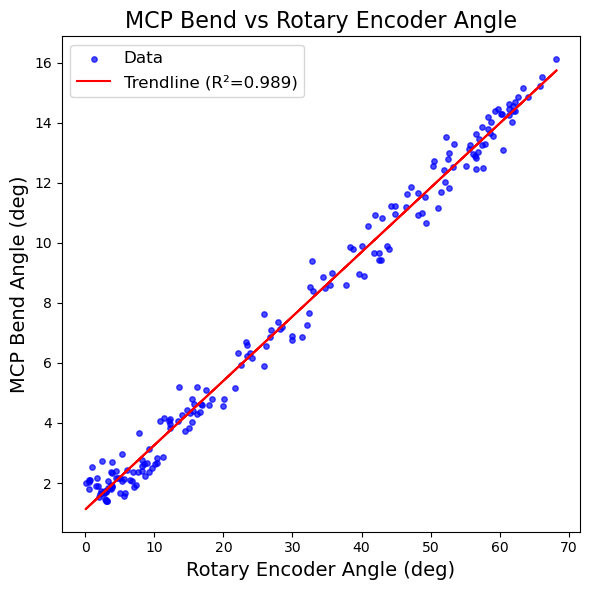

In [93]:
x = small_df["angle_renc"].to_numpy()
y = small_df[("metric", "mcp_bend_deg", "deg")].to_numpy()

# in-place (no extra array)
np.abs(x, out=x)

# Fit linear regression (y = m*x + b)
m, b = np.polyfit(x, y, 1)
y_pred = m * x + b

# Compute R²
ss_res = np.sum((y - y_pred) ** 2)
ss_tot = np.sum((y - np.mean(y)) ** 2)
r2 = 1 - (ss_res / ss_tot)

# Plot
plt.figure(figsize=(6,6))
plt.scatter(x, y, s=15, alpha=0.7, color="blue", label="Data")  # blue dots
plt.plot(x, y_pred, color="red", label=f"Trendline (R²={r2:.3f})")

plt.xlabel("Rotary Encoder Angle (deg)", fontsize=14)  # bigger labels
plt.ylabel("MCP Bend Angle (deg)", fontsize=14)
plt.title("MCP Bend vs Rotary Encoder Angle", fontsize=16)

plt.grid(False)
plt.legend(fontsize=12)
plt.tight_layout()

plt.savefig("MCP Bend vs rot enc.png", dpi=300, bbox_inches='tight')
plt.show()


C:\Users\toppe\AppData\Local\Temp\ipykernel_32116\771040855.py:26: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(


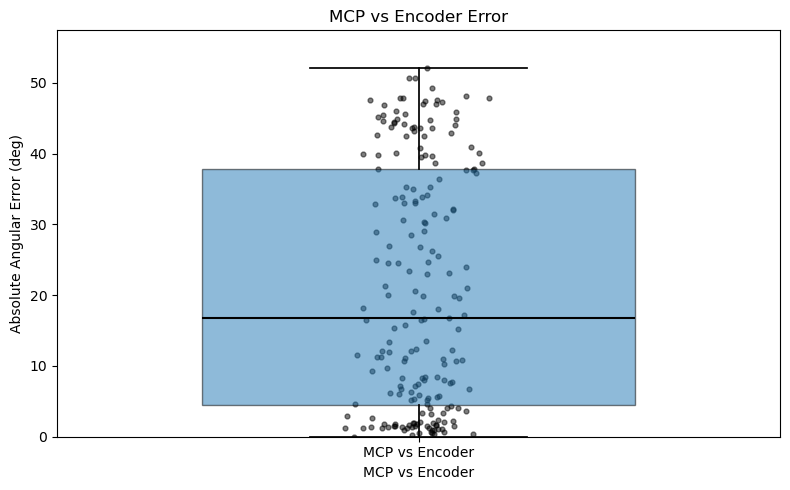

In [112]:
# --- Pull absolute error as a clean NumPy array ---
err_col = "abs_error_deg" if "abs_error_deg" in df_err.columns else "abs_error"
aerr = pd.to_numeric(df_err[err_col], errors="coerce").to_numpy()
aerr = aerr[np.isfinite(aerr)]

# --- Option A: single box (simple) ---
errors_per_run = [aerr]
labels = ["MCP vs Encoder"]

# (Optional) If you have a grouping column (e.g., 'Sample' or 'sample_id'), uncomment:
# group_col = "Sample" if "Sample" in df_err.columns else ("sample_id" if "sample_id" in df_err.columns else None)
# if group_col is not None:
#     groups = [g for g in df_err[group_col].dropna().unique().tolist()]
#     errors_per_run = [pd.to_numeric(df_err.loc[df_err[group_col]==g, err_col], errors="coerce")
#                         .dropna().to_numpy() for g in groups]
#     labels = groups

# --- Style settings (your style) ---
box_color  = "#1f77b4"
box_alpha  = 0.5
data_alpha = 0.5
jitter     = 0.04

fig, ax = plt.subplots(figsize=(8, 5))

bp = ax.boxplot(
    errors_per_run,
    labels=labels,
    patch_artist=True,
    showfliers=False,
    widths=0.6
)

# Style boxes (uniform color)
for patch in bp["boxes"]:
    patch.set_facecolor(box_color)
    patch.set_alpha(box_alpha)
    patch.set_edgecolor("black")
for med in bp["medians"]:
    med.set_color("black"); med.set_linewidth(1.5)
for w in bp["whiskers"]:
    w.set_color("black"); w.set_linewidth(1.25)
for cap in bp["caps"]:
    cap.set_color("black"); cap.set_linewidth(1.25)

# Overlay jittered points
for i, arr in enumerate(errors_per_run, start=1):
    if len(arr):
        x = np.random.normal(loc=i, scale=jitter, size=len(arr))
        ax.scatter(x, arr, s=12, alpha=data_alpha, color="black")

ax.set_xlabel(labels[0] if len(labels)==1 else "Group")
ax.set_ylabel("Absolute Angular Error (deg)")
if aerr.size:
    ymax = np.nanpercentile(aerr, 97.5)*1.2
    ax.set_ylim(0, max(15, ymax))
ax.set_title("MCP vs Encoder Error")

plt.tight_layout()
plt.show()
# plt.savefig("mcp_vs_encoder_box.png", dpi=300, bbox_inches="tight")  # optional